Rolled: 3 2 
Rolled: 2 2 
Rolled: 2 2 
Rolled: 3 6 
Rolled: 1 1 
Rolled: 6 1 
Rolled: 1 3 
Rolled: 1 2 
Rolled: 3 4 
Rolled: 4 3 
Rolled: 4 2 
Rolled: 6 6 
Rolled: 3 4 
Rolled: 3 6 
Rolled: 4 5 
Rolled: 1 5 
Rolled: 4 5 
Rolled: 1 1 
Rolled: 6 1 
Rolled: 2 2 
Rolled: 4 1 
Rolled: 6 2 
Rolled: 1 3 
Rolled: 3 6 
Rolled: 1 4 
Rolled: 3 6 
Rolled: 5 2 
Rolled: 6 4 
Rolled: 2 6 
Rolled: 2 1 
Rolled: 1 3 
Rolled: 5 5 
Rolled: 1 4 
Rolled: 2 3 
Rolled: 3 6 
Rolled: 2 5 
Rolled: 4 1 
Rolled: 4 3 
Rolled: 5 5 
Rolled: 4 6 
Rolled: 5 1 
Rolled: 5 4 
Rolled: 5 5 
Rolled: 5 3 
Rolled: 4 5 
Rolled: 5 4 
Rolled: 4 6 
Rolled: 6 3 
Rolled: 6 3 
Rolled: 4 1 
Rolled: 6 4 
Rolled: 2 6 
Rolled: 2 4 
Rolled: 1 1 
Rolled: 6 2 
Rolled: 4 5 
Rolled: 3 1 
Rolled: 3 3 
Rolled: 2 4 
Rolled: 1 3 
Rolled: 5 5 
Rolled: 5 6 
Rolled: 2 5 
Rolled: 5 1 
Rolled: 5 1 
Rolled: 2 1 
Rolled: 1 2 
Rolled: 4 6 
Rolled: 5 2 
Rolled: 2 2 
Rolled: 6 6 
Rolled: 4 5 
Rolled: 2 3 
Rolled: 6 1 
Rolled: 6 4 
Rolled: 3 6 
Rolled: 3 3 

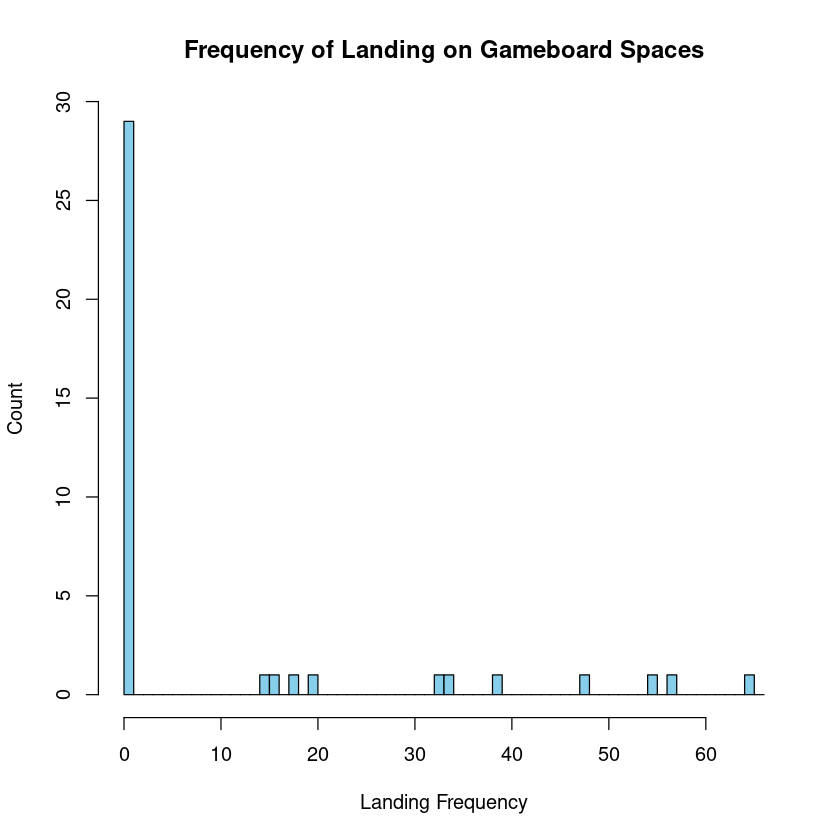

In [3]:
# Load the required packages
library(ggplot2)

# Define the gameboard
gameboard <- data.frame(space = 1:40, title = c("Go", "Mediterranean Avenue", "Community Chest", "Baltic Avenue", "Income Tax", "Reading Railroad", "Oriental Avenue", "Chance", "Vermont Avenue", "Connecticut Avenue", "Jail", "St. Charles Place", "Electric Company", "States Avenue", "Virginia Avenue", "Pennsylvania Railroad", "St. James Place", "Community Chest", "Tennessee Avenue", "New York Avenue", "Free Parking", "Kentucky Avenue", "Chance", "Indiana Avenue", "Illinois Avenue", "B & O Railroad", "Atlantic Avenue", "Ventnor Avenue", "Water Works", "Marvin Gardens", "Go to jail", "Pacific Avenue", "North Carolina Avenue", "Community Chest", "Pennsylvania Avenue", "Short Line Railroad", "Chance", "Park Place", "Luxury Tax", "Boardwalk"))

chancedeck <- data.frame(index = 1:15, card = c("Advance to Go", "Advance to Illinois Ave.", "Advance to St. Charles Place", "Advance token to nearest Utility", "Advance token to the nearest Railroad", "Take a ride on the Reading Railroad", "Take a walk on the Boardwalk", "Go to Jail", "Go Back 3 Spaces", "Bank pays you dividend of $50", "Get out of Jail Free", "Make general repairs on all your property", "Pay poor tax of $15", "You have been elected Chairman of the Board", "Your building loan matures"))

communitydeck <- data.frame(index = 1:16, card = c("Advance to Go", "Go to Jail", "Bank error in your favor. Collect $200", "Doctor's fees Pay $50", "From sale of stock you get $45", "Get Out of Jail Free", "Grand Opera Night Opening", "Xmas Fund matures", "Income tax refund", "Life insurance matures. Collect $100", "Pay hospital fees of $100", "Pay school tax of $150", "Receive for services $25", "You are assessed for street repairs", "You have won second prize in a beauty contest", "You inherit $100"))

# Define Dice class with initialization of rolls
Dice <- setRefClass("Dice",
                    fields = list(
                      rolls = "numeric",
                      pos = "numeric",
                      verbose = "logical"
                    ),
                    methods = list(
                      roll = function(verbose = TRUE) {
                        if (length(rolls) == 0) {
                          stop("Dice rolls must be provided.")
                        }
                        faces <- sample(1:6, 2, replace = TRUE)  # Simulate rolling two six-sided dice
                        pos <<- pos + 2
                        doubles <- faces[1] == faces[2]
                        movement <- sum(faces)
                        if (verbose) cat("Rolled:", faces[1], faces[2], "\n")
                        return(list(faces = faces, doubles = doubles, movement = movement))
                      }
                    )
)

# Define Player class
Player <- setRefClass("Player", 
                      fields = list(
                        pos = "numeric",      # position on the board
                        is_jailed = "logical",
                        ndoubles = "numeric",
                        verbose = "logical",
                        dice = "Dice"
                      ), 
                      methods = list(
                        move_n = function(n) {
                          if (verbose) cat("Player at:", pos)
                          if (verbose) cat(" Player moves:", n)
                          pos <<- pos + n
                          if (pos > 40) pos <<- pos - 40
                          if (verbose) cat(" Player now at:", pos, "\n")
                        },
                        go_2_space_n = function(n){
                          if (verbose) cat("Player at:", pos, ".")
                          pos <<- n
                          if (verbose) cat(" Player now at:", pos, ".\n")
                        },
                        chance_card = function(){
                          ncard <- sample(chancedeck$index, 1)
                          if (verbose) cat("Player Picked a Chance Card! \n")
                          if (ncard == 1) pos <<- 1
                          if (ncard == 2) pos <<- 25
                          if (ncard == 3) pos <<- 12
                          if (ncard == 4){
                            for (i in pos:length(utility)){
                              if (utility[i]){
                                pos <<- i
                                break
                              } else if (i == 40) pos <<- 13
                            }
                          }
                          if (ncard == 5){
                            for (i in pos:length(railroads)){
                              if (railroads[i]){
                                pos <<- i
                                break
                              } else if (i == 40) pos <<- 6
                            }
                          }
                          if (ncard == 6) pos <<- 6
                          if (ncard == 7) pos <<- 40
                          if (ncard == 8){
                            pos <<- 11
                            is_jailed <<- TRUE
                            if (verbose) cat("8th Chance Card selected: 'Go to Jail' ")
                          }
                          if (ncard == 9) pos <<- pos - 3
                        },
                        community_chest_card = function(){
                          ncard <- sample(communitydeck$index, 1)
                          if (verbose) cat("Player Picked a Community Chest Card! \n")
                          if (ncard == 1) pos <<- 1
                          if (ncard == 2){
                            pos <<- 11
                            is_jailed <<- TRUE
                          }
                        },
                        go_to_jail = function() {
                          if (verbose) cat("Going to Jail! \n")
                          pos <<- 11
                          is_jailed <<- TRUE
                        },
                        rolling_doubles = function(move) {
                          if (!is.null(move) && !is.null(move$doubles) && move$doubles) {
                            ndoubles <<- ndoubles + 1
                            if (verbose) cat("The count of doubles is currently:", ndoubles, "\n")
                            if (ndoubles == 3) {
                              if (verbose) cat("Going to Jail! \n")
                              pos <<- 11
                              ndoubles <<- 0
                              is_jailed <<- TRUE
                              return(FALSE)
                            } else {
                              return(TRUE)
                            }
                          } else {
                            ndoubles <<- 0
                            return(TRUE)
                          }
                        },
                        re_rolling = function() {
                          if (ndoubles > 0) {
                            if (verbose) cat("Player just rolled a double, please take another turn. \n")
                            taketurn(tracking)
                          }
                        },
                        jail_functionality = function(move) {
                          if (!is.null(move) && move$doubles) {
                            is_jailed <<- FALSE
                            ndoubles <<- 0
                            if (verbose) cat("In Jail: Player rolled doubles \nGets out of jail. \n")
                            return(TRUE)
                          } else if (ndoubles == 2) {
                            is_jailed <<- FALSE
                            ndoubles <<- 0
                            if (verbose) cat("In Jail: Players third turn in jail \nGets out of jail. \n")
                            return(TRUE)
                          } else {
                            if (verbose) cat("Staying in Jail. \n")
                            ndoubles <<- ndoubles + 1
                            return(FALSE)
                          }
                        }
                      )
)

# Define a class to track the number of times each space is landed on during the simulation
tracking <- setRefClass("tracking",
                        fields = list(
                          tally = "numeric"
                        ),
                        methods = list(
                          increase_count = function(n, verbose = FALSE) {
                            if (verbose) {
                              cat("Landed on space ", n, " times.\n")
                            }
                            tally[n] <<- tally[n] + 1
                          },
                          initialize = function() {
                            tally <<- rep(0, 40) # Initialize tally for each space on the gameboard
                          }
                        )
)

# Function to simulate a single turn for a player
taketurn <- function(player, space_tracking){
  move <- player$dice$roll()
  space_tracking$increase_count(move$movement)
  
  if (!player$is_jailed) {
    if (!player$rolling_doubles(move)) {
      return
    }
    if (move$movement == 0) {
      if (player$is_jailed) {
        player$jail_functionality(move)
        player$re_rolling()
        return
      }
    }
    player$move_n(move$movement)
    if (player$pos == 31) {
      player$is_jailed <- TRUE
      player$pos <- 11
      if (player$verbose) cat("Player lands on 'Go to jail' space, goes to jail! \n")
    }
    if (gameboard$space[player$pos] == "Community Chest") {
      player$community_chest_card()
    }
    if (gameboard$space[player$pos] == "Chance") {
      player$chance_card()
    }
  } else {
    if (player$jail_functionality(move)) {
      player$move_n(move$movement)
    }
  }
}

# Define a function to simulate a game with a specified number of players and turns
simulate_game <- function(nplayers, nturns, verbose = FALSE){
  # Define and instantiate the tracking object
  space_tracking <- tracking$new()
  
  players <- list()
  
  # Generate random dice rolls for each player and each turn
  dice_rolls <- replicate(nplayers, matrix(sample(1:6, nturns * 2, replace = TRUE), ncol = 2))
  
  for (i in 1:nplayers) {
    players[[i]] <- Player$new(pos = 1, is_jailed = FALSE, ndoubles = 0, verbose = verbose, dice = Dice$new(rolls = dice_rolls[[i]]))
  }
  
  for (i in 1:nturns) {
    for (j in 1:nplayers) {
      # Pass the tracking object to taketurn function
      taketurn(players[[j]], space_tracking)
    }
  }
  
  return(space_tracking$tally)
}

# Simulate the game with 4 players and 100 turns
set.seed(123)  # Set seed for reproducibility
results <- simulate_game(4, 100, verbose = FALSE)

# Plotting the histogram
results_hist <- hist(results, breaks = seq(0, max(results) + 1, by = 1), col = "skyblue",
                     main = "Frequency of Landing on Gameboard Spaces",
                     xlab = "Landing Frequency", ylab = "Count")